In [1]:
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines .xlsx to EastWestAirlines .xlsx


In [5]:
data=pd.read_excel('EastWestAirlines .xlsx')

In [6]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
data.shape

(3999, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [10]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [11]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [18]:
data1=data.drop(["ID#"],axis=1)
data.shape

(3999, 12)

In [19]:
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [20]:
data2=data1.rename(columns={'Qual_miles':'Qual','cc1_miles':'cc1','cc2_miles':'cc2','cc3_miles':'cc3','Bonus_miles':'BM','Bonus_trans':'BT','Flight_miles_12mo':'FM'})
data2

,Balance,Qual,cc1,cc2,cc3,BM,BT,FM,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [21]:
data3=data2.rename(columns={'Flight_trans_12':'FT','Days_since_enroll':'Days','Award?':'Award'})
data3

,Balance,Qual,cc1,cc2,cc3,BM,BT,FM,FT,Days,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [31]:
data3['Award'].value_counts()

0    2518
1    1481
Name: Award, dtype: int64

In [32]:
data3['cc1'].value_counts()

1    2289
3     613
4     525
5     288
2     284
Name: cc1, dtype: int64

In [33]:
data3['cc2'].value_counts()

1    3956
2      28
3      15
Name: cc2, dtype: int64

In [34]:
data3['cc3'].value_counts()

1    3981
4       6
5       5
3       4
2       3
Name: cc3, dtype: int64

In [35]:
data3['BT'].value_counts()

0     475
14    262
3     250
13    231
15    212
1     212
4     190
16    189
12    148
17    140
5     126
18    125
6     115
11    108
2     104
8     100
10     97
19     97
9      91
7      88
20     85
21     69
22     63
24     41
26     41
23     35
25     34
27     32
28     28
32     26
29     23
31     21
30     17
34     15
39     12
35     11
37     11
38     10
33      8
41      7
43      7
36      6
45      5
40      4
53      4
51      4
44      3
50      3
47      3
46      2
65      2
49      2
55      1
52      1
58      1
86      1
68      1
Name: BT, dtype: int64

In [36]:
data3['FT'].value_counts()

0     2723
1      469
2      242
3      132
4       97
5       58
6       43
9       32
8       31
7       30
11      19
12      16
10      16
16      11
15       9
18       8
17       8
23       7
14       7
13       7
29       5
26       5
28       4
20       4
24       4
53       2
19       2
36       1
45       1
27       1
31       1
21       1
25       1
22       1
46       1
Name: FT, dtype: int64

In [37]:
data3['Qual'].value_counts()

0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: Qual, Length: 164, dtype: int64

In [38]:
# Normalization function # use sklearn library norm
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [41]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data3.iloc[:,0:])

In [42]:
df_norm

,Balance,Qual,cc1,cc2,cc3,BM,BT,FM,FT,Days,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


<Figure size 3600x1800 with 0 Axes>

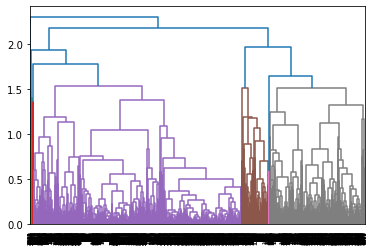

<Figure size 3600x1800 with 0 Axes>

In [48]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

plt.figure(figsize=(50,25))


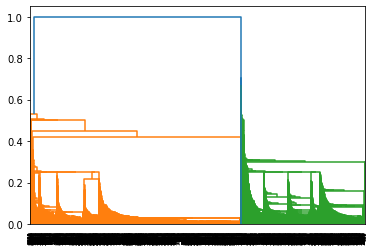

In [45]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))
plt.figure(figsize=(50,25))

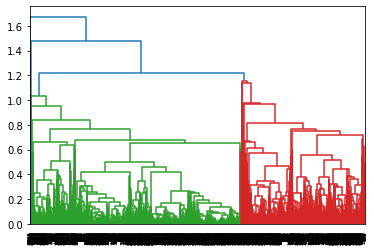

In [46]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))
plt.figure(figsize=(50,25))

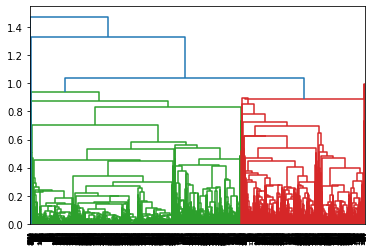

In [47]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))
plt.figure(figsize=(50,25))

In [49]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [50]:
hc.fit(df_norm)
# hc.predict(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [51]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [52]:
y_hc

array([0, 0, 0, ..., 2, 0, 0])

In [53]:
data3['h_clusterid'] = y_hc

In [54]:
data3.head()

,Balance,Qual,cc1,cc2,cc3,BM,BT,FM,FT,Days,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [60]:
data4=data3.sort_values("h_clusterid")
data4.iloc[:,[0,-1]]

,Balance,h_clusterid
0,28143,0
2485,23649,0
2487,169794,0
2488,23781,0
2491,5970,0
...,...,...
940,44824,4
3959,13942,4
3779,35850,4
1389,49145,4


#Creating Clusters for average linkage

In [61]:
# create clusters 
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [62]:
hc.fit(df_norm)
# hc.predict(df_norm)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [63]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [64]:
y_hc 

array([1, 1, 1, ..., 0, 1, 1])

In [66]:
data3['h_clusterid'] = y_hc

In [67]:
data3.head()

,Balance,Qual,cc1,cc2,cc3,BM,BT,FM,FT,Days,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [71]:
data5=data3.sort_values("h_clusterid")
data5.iloc[:,[-1]]

,h_clusterid
1999,0
269,0
589,0
268,0
619,0
...,...
384,4
106,4
1946,4
2364,4


Interpretation:Here i have formed clusters for the "EastWest  Airlines dataset".
step1: I have renamed the columes and checked for null values.
check for value counts.
step2:Droped unnecessary feature which doesnt add any value for my further process .
step3:Created dendrogram for centroid, average, complete and centroid linkages.
step4:Created clusters for all linkages.

